# Endterm Project EDA

Name: **Fritz Andrew E. Flores** <br>
Course: **CPE2A**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Overview of the Uncleaned Dataset

In [2]:
df = pd.read_csv(r"raw\all_bikez_curated.csv",delimiter = ",")
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                38472 non-null  object 
 1   Model                38444 non-null  object 
 2   Year                 38472 non-null  int64  
 3   Category             38472 non-null  object 
 4   Rating               21788 non-null  float64
 5   Displacement (ccm)   37461 non-null  float64
 6   Power (hp)           26110 non-null  float64
 7   Torque (Nm)          16634 non-null  float64
 8   Engine cylinder      38461 non-null  object 
 9   Engine stroke        38461 non-null  object 
 10  Gearbox              32675 non-null  object 
 11  Bore (mm)            28689 non-null  float64
 12  Stroke (mm)          28689 non-null  object 
 13  Fuel capacity (lts)  31704 non-null  float64
 14  Fuel system          27844 non-null  object 
 15  Fuel control         22008 non-null 

C:\Users\flore\AppData\Local\Temp\ipykernel_27552\276506731.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"raw\all_bikez_curated.csv",delimiter = ",")


In [3]:
df.head()

,Brand,Model,Year,Category,Rating,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke,...,Dry weight (kg),Wheelbase (mm),Seat height (mm),Front brakes,Rear brakes,Front tire,Rear tire,Front suspension,Rear suspension,Color options
0,acabion,da vinci 650-vi,2011,Prototype / concept model,3.2,NaN,804.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
1,acabion,gtbo 55,2007,Sport,2.6,1300.0,541.0,420.0,In-line four,four-stroke,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,3.5,NaN,536.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,NaN,NaN,536.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
4,acabion,gtbo 70,2007,Prototype / concept model,3.1,1300.0,689.0,490.0,In-line four,four-stroke,...,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Custom made.


# Data Cleaning - Dropping NaN

In [4]:
df["Stroke (mm)"] = pd.to_numeric(df["Stroke (mm)"], errors="coerce")

num_cols = df.select_dtypes(include=["number"]).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.mean()))

cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")

df.to_csv(r"raw\cleaned_bikez_curated.csv", index=False)


# Overview of the Cleaned Dataset

In [5]:
df = pd.read_csv(r"raw\cleaned_bikez_curated.csv",delimiter = ",")
df.info() 

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                38472 non-null  object 
 1   Model                38472 non-null  object 
 2   Year                 38472 non-null  int64  
 3   Category             38472 non-null  object 
 4   Rating               38472 non-null  float64
 5   Displacement (ccm)   38472 non-null  float64
 6   Power (hp)           38472 non-null  float64
 7   Torque (Nm)          38472 non-null  float64
 8   Engine cylinder      38472 non-null  object 
 9   Engine stroke        38472 non-null  object 
 10  Gearbox              38472 non-null  object 
 11  Bore (mm)            38472 non-null  float64
 12  Stroke (mm)          38472 non-null  float64
 13  Fuel capacity (lts)  38472 non-null  float64
 14  Fuel system          38472 non-null  object 
 15  Fuel control         38472 non-null 

,Brand,Model,Year,Category,Rating,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke,...,Dry weight (kg),Wheelbase (mm),Seat height (mm),Front brakes,Rear brakes,Front tire,Rear tire,Front suspension,Rear suspension,Color options
0,acabion,da vinci 650-vi,2011,Prototype / concept model,3.200000,552.515072,804.0,64.527173,Electric,Electric,...,420.0,1423.113521,789.253246,Single disc,Single disc,Unknown,Unknown,Unknown,Unknown,Unknown
1,acabion,gtbo 55,2007,Sport,2.600000,1300.000000,541.0,420.000000,In-line four,four-stroke,...,360.0,1423.113521,789.253246,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,3.500000,552.515072,536.0,64.527173,Electric,Electric,...,420.0,1423.113521,789.253246,Single disc,Single disc,Unknown,Unknown,Unknown,Unknown,Unknown
3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,3.401574,552.515072,536.0,64.527173,Electric,Electric,...,420.0,1423.113521,789.253246,Single disc,Single disc,Unknown,Unknown,Unknown,Unknown,Unknown
4,acabion,gtbo 70,2007,Prototype / concept model,3.100000,1300.000000,689.0,490.000000,In-line four,four-stroke,...,300.0,1423.113521,789.253246,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Custom made.


# Data Distribion in terms of Ratings

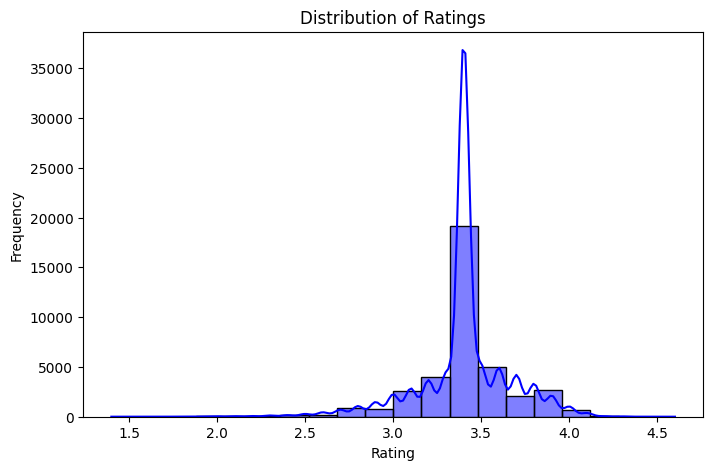

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Top 10 Brands by Number of Models

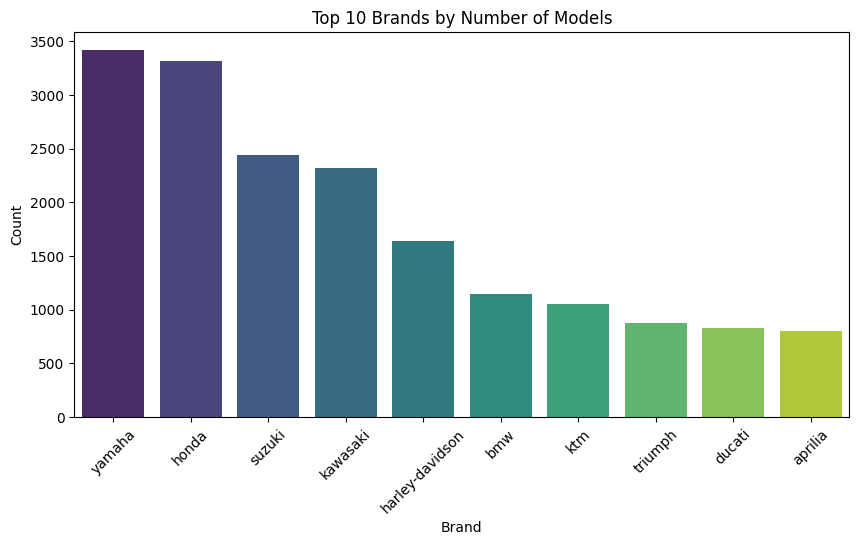

In [7]:
top_brands = df['Brand'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.index, y=top_brands.values, hue=top_brands.index, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('Top 10 Brands by Number of Models')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

# Category Distribution

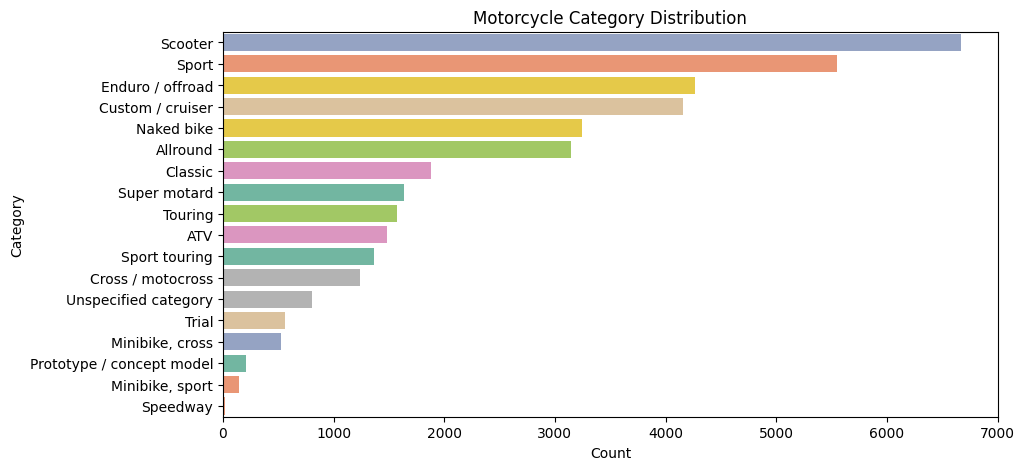

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, hue=df['Category'], palette='Set2', legend=False)
plt.title('Motorcycle Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

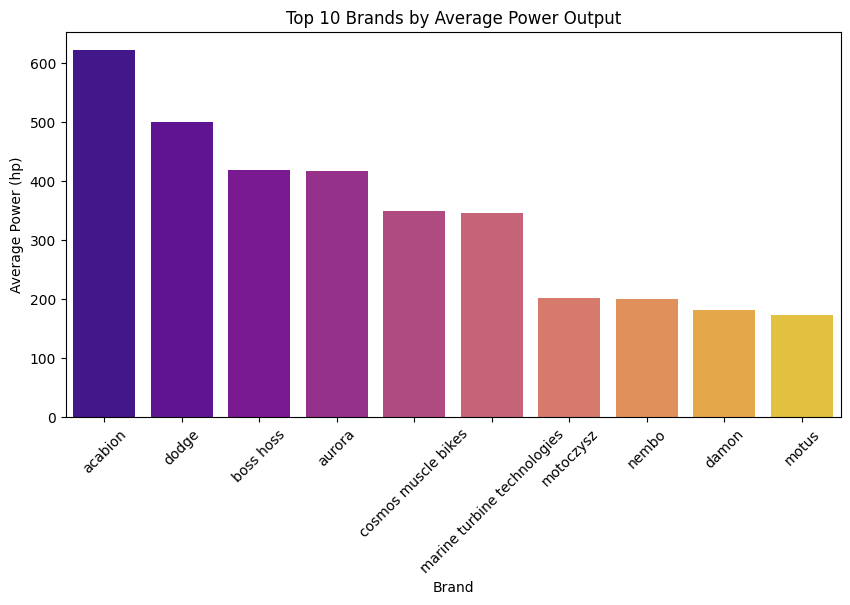

In [9]:
top_brands_power = df.groupby('Brand')['Power (hp)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands_power.index, y=top_brands_power.values, hue=top_brands_power.index, dodge=False, palette='plasma', legend=False)
plt.xticks(rotation=45)
plt.title('Top 10 Brands by Average Power Output')
plt.xlabel('Brand')
plt.ylabel('Average Power (hp)')
plt.show()


# Engine Displacement vs Power

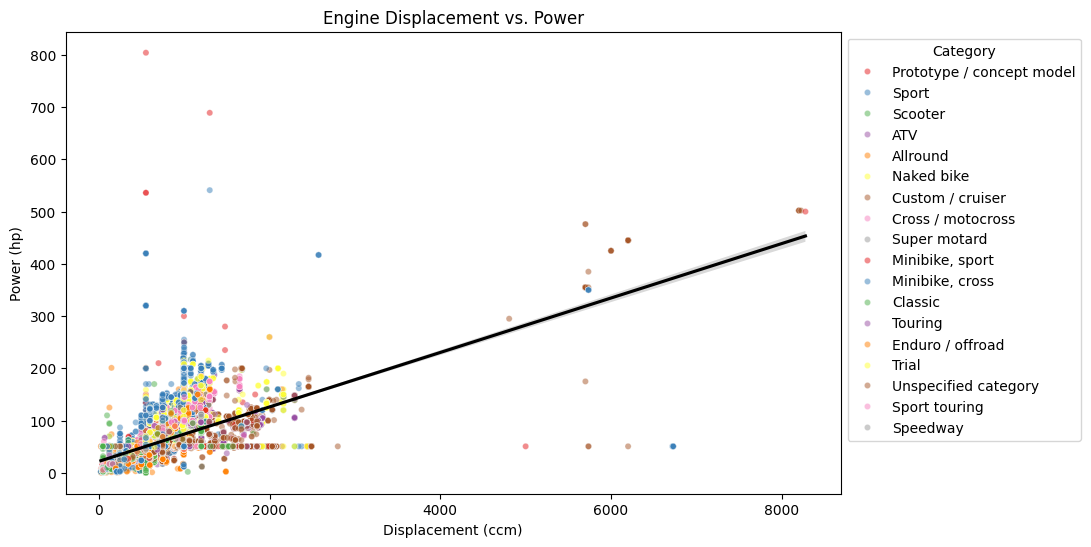

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Displacement (ccm)'], y=df['Power (hp)'], alpha=0.5, hue=df['Category'], palette='Set1', s=20)
sns.regplot(x=df['Displacement (ccm)'], y=df['Power (hp)'], scatter=False, color='black')
plt.title('Engine Displacement vs. Power')
plt.xlabel('Displacement (ccm)')
plt.ylabel('Power (hp)')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()

# Engine Displacement vs Torque

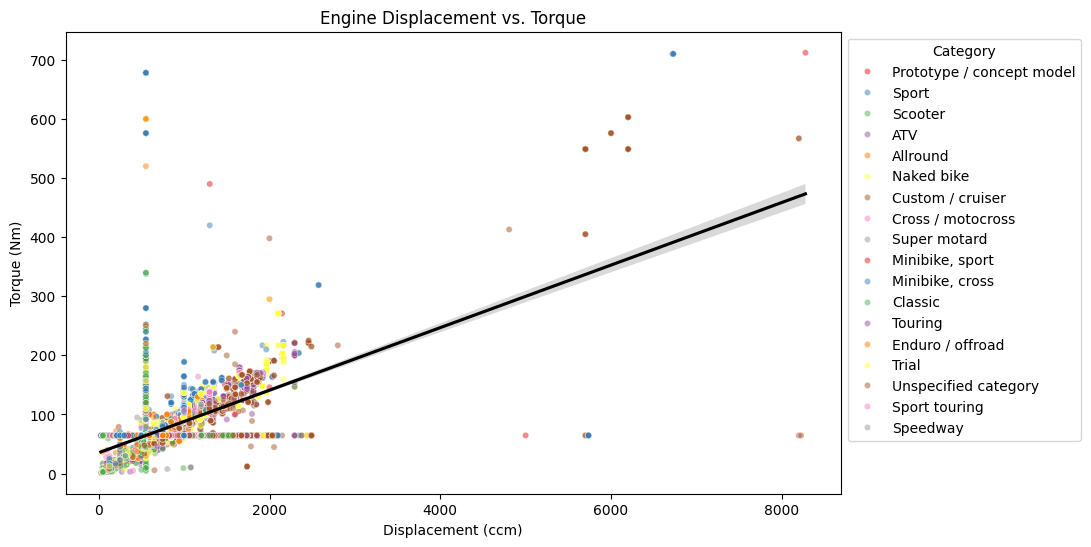

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Displacement (ccm)'], y=df['Torque (Nm)'], alpha=0.5, hue=df['Category'], palette='Set1', s=20)
sns.regplot(x=df['Displacement (ccm)'], y=df['Torque (Nm)'], scatter=False, color='black')
plt.title('Engine Displacement vs. Torque')
plt.xlabel('Displacement (ccm)')
plt.ylabel('Torque (Nm)')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()


# Power vs Torque

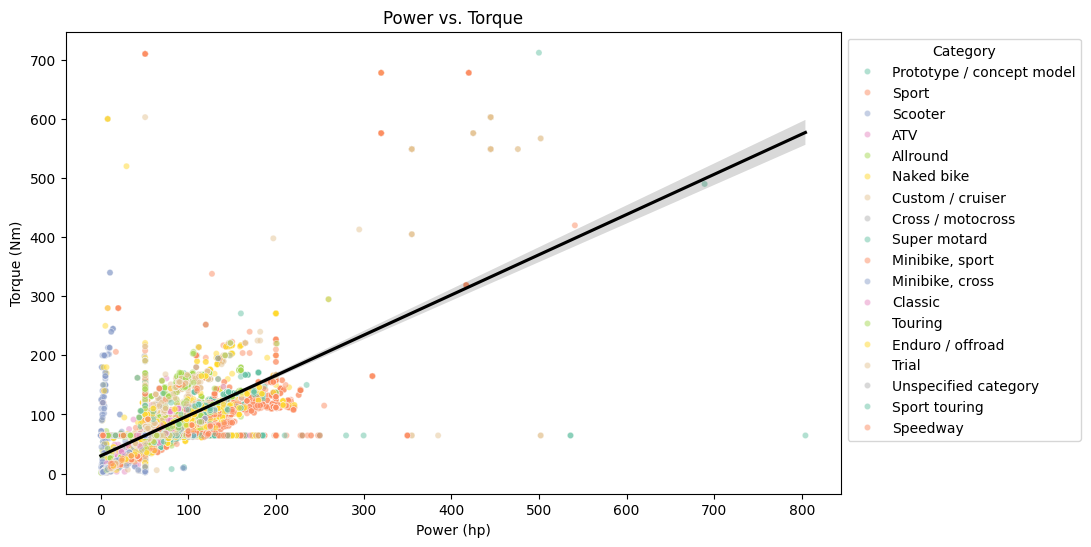

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Power (hp)'], y=df['Torque (Nm)'], alpha=0.5, hue=df['Category'], palette='Set2', s=20)
sns.regplot(x=df['Power (hp)'], y=df['Torque (Nm)'], scatter=False, color='black')
plt.title('Power vs. Torque')
plt.xlabel('Power (hp)')
plt.ylabel('Torque (Nm)')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()

# Power vs Dry Weight

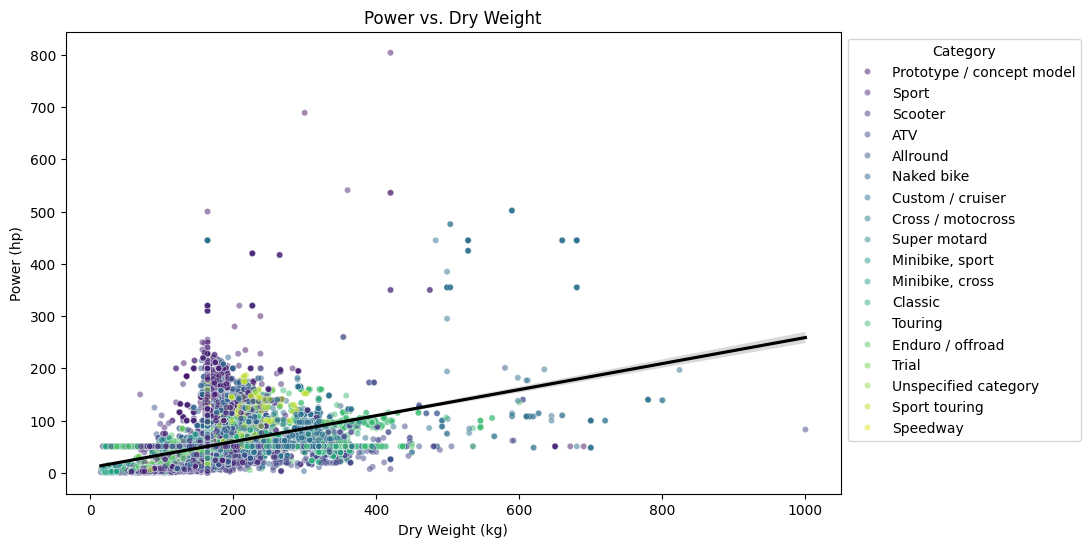

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Dry weight (kg)'], y=df['Power (hp)'], alpha=0.5, s=20, hue=df['Category'], palette='viridis')
sns.regplot(x=df['Dry weight (kg)'], y=df['Power (hp)'], scatter=False, color='black')
plt.title('Power vs. Dry Weight')
plt.xlabel('Dry Weight (kg)')
plt.ylabel('Power (hp)')
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# Engine Cylinder Count Distribution

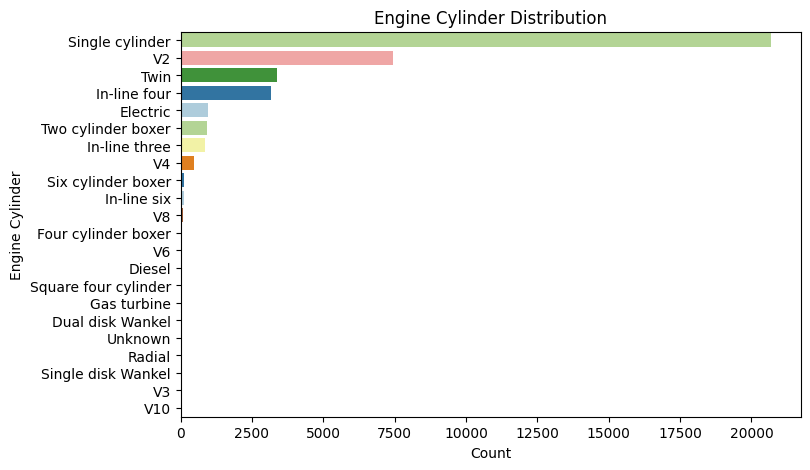

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df['Engine cylinder'], order=df['Engine cylinder'].value_counts().index, hue=df['Engine cylinder'], palette='Paired', legend=False)
plt.title('Engine Cylinder Distribution')
plt.xlabel('Count')
plt.ylabel('Engine Cylinder')
plt.show()

# Motorcycle Releases Yearly Trend

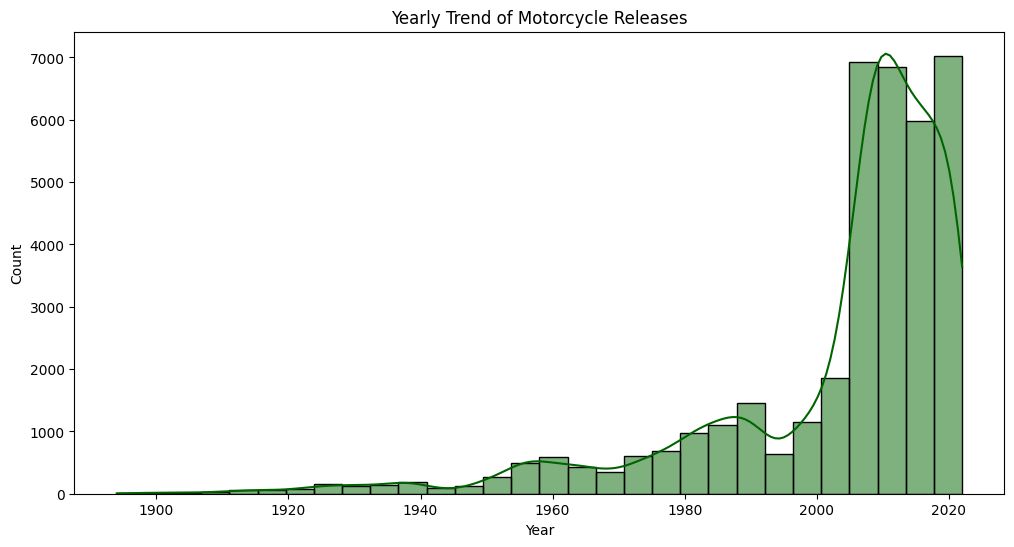

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Year'], bins=30, kde=True, color='darkgreen')
plt.title('Yearly Trend of Motorcycle Releases')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Measures of Central Tendency & Visualization 

In [16]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
descriptive_stats = df[numeric_columns].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nCentral Tendency & Variability:\n", descriptive_stats)


Central Tendency & Variability:
                Year    Rating  Displacement (ccm)  Power (hp)  Torque (Nm)  \
mean    2003.195883  3.401574          552.515072    50.77604    64.527173   
median  2010.000000  3.401574          400.000000    50.77604    64.527173   
std       20.083372  0.267628          538.180882    42.90588    42.006365   
min     1894.000000  1.400000           25.000000     0.30000     1.500000   
max     2022.000000  4.600000         8277.000000   804.00000   712.000000   

         Bore (mm)  Stroke (mm)  Fuel capacity (lts)  Dry weight (kg)  \
mean     72.596713    64.841331            13.286191       164.151532   
median   72.596713    64.841331            13.286191       164.151532   
std      16.198855    15.795921             5.456401        65.043577   
min       1.000000     0.000000             0.500000        15.100000   
max     176.000000   458.600000            64.340000      1000.000000   

        Wheelbase (mm)  Seat height (mm)  
mean       1423

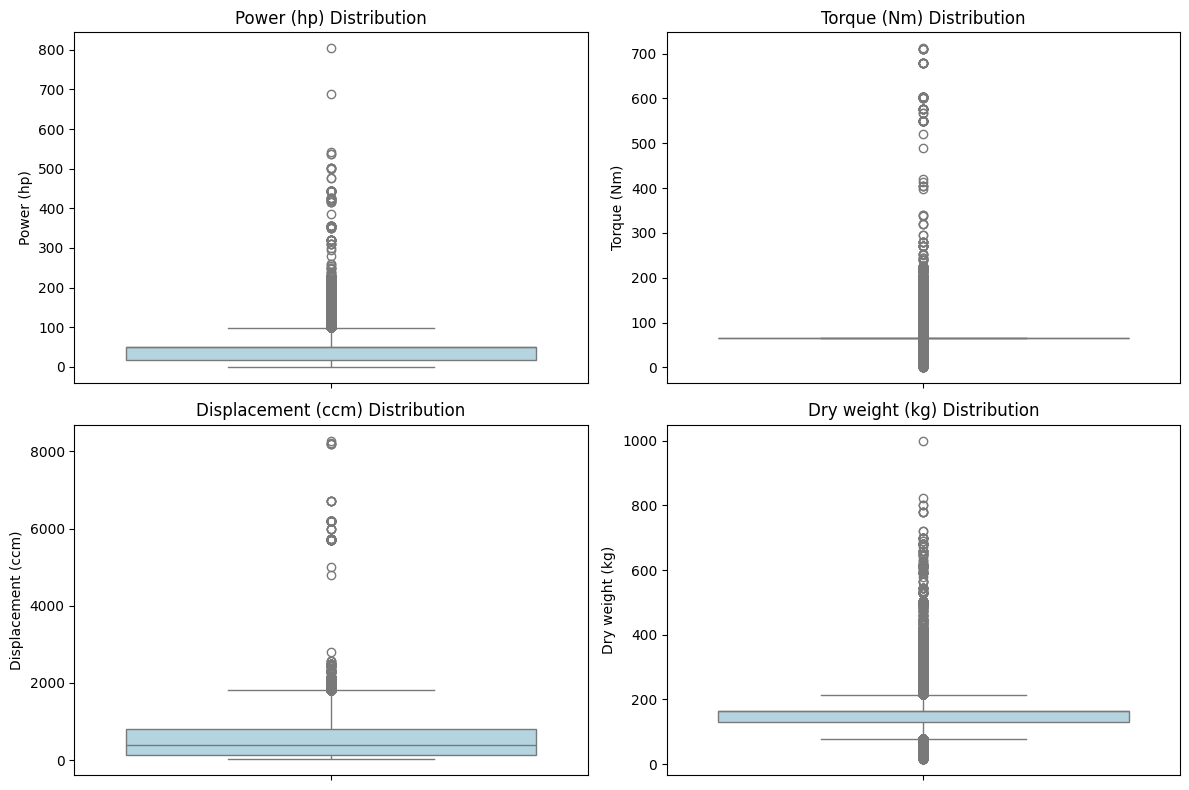

In [17]:
selected_columns = ['Power (hp)', 'Torque (Nm)', 'Displacement (ccm)', 'Dry weight (kg)']

plt.figure(figsize=(12, 8))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()